In [1]:
from env import simGym
from ppo_network import PolicyNetwork
import numpy as np
from data import Trajectory, Buffer
import pickle
from datetime import datetime

In [2]:
from make import make_environment

In [4]:
env_name='cartpole'
#sim = simGym(env_name)
sim = make_environment(domain_name='cartpole', task_name='balance')
observation, info = sim.reset()
n_actions = sim.action_space.shape[0]
n_states = sim.observation_space.shape[0]
n_steps = 1000  # steps for per episode
n_episodes = 20
n_steps_per_learn = n_episodes * n_steps
# pn = Agent(n_states, 
#                  n_actions, 
#                  n_steps, 
#                  n_episodes)
pn = PolicyNetwork(n_states, 
                 n_actions, 
                 n_steps, 
                 n_steps_per_learn)
pn.env_name=env_name
t = Trajectory()
buffer = Buffer(n_states, n_actions, n_episodes, n_steps)

In [9]:
sim.env.observation_space.shape[0]
sim.env.action_space.shape[0]

4

In [5]:

training_times = 1001
reward_list = []
for times in range(training_times):
    if pn.current_training_time%100 == 0: # auto save model
        current_date_and_time = datetime.now()
        name = "./model/" + str(pn.current_training_time) + "-" + str(current_date_and_time) + ".model"
        with open(name, "wb") as f: 
            pickle.dump(pn, f)
    buffer.reset()
    for i in range(n_episodes):
        t.reset()
        for _ in range(n_steps):
            actions = pn.infer(state=observation, noise=True)
            # actions = pn.get_action(observation)
            observation, reward, terminated, truncated, info = sim.step(actions)
            # print(actions, reward)
            if terminated or truncated:
                reward = 0
                #observation, info = sim.reset()
            t.add(observation, actions, reward)
        observation, info = sim.reset()
        buffer.add(t)
    print(times, np.mean(buffer.rewards))
    reward_list.append(np.mean(buffer.rewards))
    pn.learn(buffer)


0 0.3295637729374648
1 0.18469658060778502
2 0.16057057791713414
3 0.15848848910402225
4 0.19250238435940192
5 0.1856681670261147
6 0.18221194029681181
7 0.1967414430680376
8 0.1948077032300197
9 0.1782504502504353
10 0.17748590448029203
11 0.18548842186042133
12 0.18038235498812227
13 0.1891600743450903
14 0.18342234601780794
15 0.1898009139390318
16 0.18499908402347096
17 0.1846004204546495
18 0.18295081191895446
19 0.186120830493055
20 0.18381584777031523
21 0.18156575899885316
22 0.18287590771428164
23 0.1802429412787767
24 0.1883704993584112
25 0.18722135493635583
26 0.18802208391045952
27 0.18566590580799772
28 0.19188187013783878
29 0.18420222510063877
30 0.1943428056714173
31 0.1708074267838073
32 0.17074226828062786
33 0.17065155569108414
34 0.17432761976663824
35 0.1805348313710549
36 0.17968671027654765
37 0.18264915408836618
38 0.17539575908248098
39 0.18934505163755158
40 0.18363375581812524
41 0.18584135083383926
42 0.16970480850862119
43 0.18165818483456295
44 0.18115252

In [9]:
print(type(buffer.rewards.dtype))
for item in buffer.rewards:
    if 1 in item:
        print(item)

<class 'numpy.dtype[float64]'>
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0. 0.

In [15]:
sim.env.

Text(0, 0.5, 'mean reward')

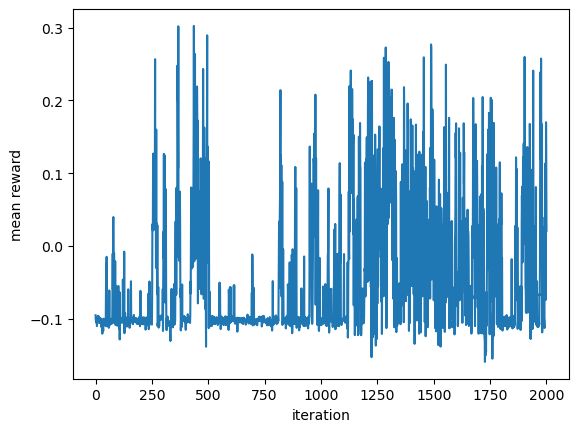

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reward_list)
plt.xlabel("iteration")
plt.ylabel("mean reward")

In [5]:
# show results
sim = simGym('InvertedPendulum-v4',render_mode=True)
observation, info = sim.reset()
for _ in range(300):
            actions = pn.infer(state=observation, noise=None)
            observation, reward, terminated, truncated, info = sim.step(actions)
            if terminated or truncated:
                observation, info = sim.reset()
                break

AttributeError: 'mujoco._structs.MjData' object has no attribute 'solver_iter'

In [7]:
current_date_and_time = datetime.now()
name = "./model/" + str(pn.current_training_time) + "-" + str(current_date_and_time) + ".model"
with open(name, "wb") as f: 
    pickle.dump(pn, f)

In [ ]:
with open("499-2024-04-09 13:01:57.811687.model", "rb") as f: # "rb" because we want to read in binary 
    pn = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '499-2024-04-09 13:01:57.811687.model'